<a href="https://colab.research.google.com/github/Dosubeen630/AI-project/blob/main/%08TorchProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Minist data 준비
from pathlib import Path
import requests
# 경로설정을 담당하는 python3 라이브러리의 일부인 pathlib, 데이터 셋을 다운로드할 requests 모듈을 불러온다.
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)
        # 위의 if문은 위의 url에서  filename이 지정된 경로에 없으면 다운 받아라 라는 의미이다.

In [ ]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
               ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f , encoding="latin-1")

# 이 데이터 셋은 Numpy 배열 포맷이고, 데이터 직렬화하기 위한 파이썬 전용 포맷 pickle을 이용하여 저장되어 있음


(50000, 784)


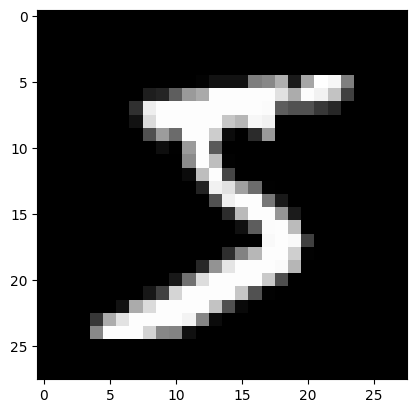

In [ ]:
from matplotlib import pyplot
import numpy as np
# 그래프를 그리기 위한 맷플로립과 넘파이 모듈을 불러온다.
pyplot.imshow(x_train[0].reshape((28,28)), cmap="gray")
print(x_train.shape) # 첫번째 x_train 의 이미지를  화면에 출력해본다.
# MNIST은 손글씨 이미지 데이터 집합으로 이미지는 그레이스케일 이미지이며, 28*28 픽셀크기에 숫자 0부터 9중 하나가 씌여있다.
# 데이터는 일반적인 이미지 포맷이 아니고 각 픽셀의 강도와 숫자 레이블의 쌍이다.

In [ ]:
# PyTorch는 NumPy 배열보다는  torch.tensor를 사용하므로 데이터 변환을 해야함. 아래의 코드는 데이터 변환을 하는 것임
import torch

x_train, y_train, x_valid, y_valid = map( torch.tensor, (x_train, y_train, x_valid, y_valid))
n,c = x_train.shape
print(x_train,y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())
# 위에서 다운 받은 이미지의 넘파이 배열을 텐서로 변환해주는 것임. 그리고 나서 변환된 데이터를 확인 하기 위해 첫번째 출력해봄. 두번째는 의 사이즈 확인, 세번째는 의 최소값과 최대값을 출력을 통해 알 수 있다.
#x_train은 훈련 데이터 의미 y_train 훈련 데이터의 레이블을 의미

<ipython-input-7-4c5525f8577b>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train, x_valid, y_valid = map( torch.tensor, (x_train, y_train, x_valid, y_valid))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [ ]:
# "torch.nn" 없이 밑바닥부터 신경망 만들기
import math

weights = torch.randn(784,10) / math.sqrt(784)
print(weights)
weights.requires_grad_()
print(weights.requires_grad_())
bias = torch.zeros(10, requires_grad=True)
print(bias)
# 간단한 선형 모델의 가중치(weights)와 절편(bias)을 생성 . requires_grad를 통해 가중치를 초기화 . 절편도 초기화 시켜줌.

tensor([[-0.0129,  0.0320, -0.0633,  ...,  0.0013, -0.0486,  0.0421],
        [ 0.0067,  0.0741,  0.0642,  ...,  0.0218, -0.0020, -0.0202],
        [-0.0469,  0.0158, -0.0483,  ..., -0.0430,  0.0077,  0.0274],
        ...,
        [ 0.0212,  0.0014,  0.0571,  ..., -0.0045,  0.0451, -0.0068],
        [-0.0266, -0.0205,  0.0284,  ...,  0.0564, -0.0719, -0.0283],
        [ 0.0640,  0.0658,  0.0186,  ...,  0.0349, -0.0172, -0.0162]])
tensor([[-0.0129,  0.0320, -0.0633,  ...,  0.0013, -0.0486,  0.0421],
        [ 0.0067,  0.0741,  0.0642,  ...,  0.0218, -0.0020, -0.0202],
        [-0.0469,  0.0158, -0.0483,  ..., -0.0430,  0.0077,  0.0274],
        ...,
        [ 0.0212,  0.0014,  0.0571,  ..., -0.0045,  0.0451, -0.0068],
        [-0.0266, -0.0205,  0.0284,  ...,  0.0564, -0.0719, -0.0283],
        [ 0.0640,  0.0658,  0.0186,  ...,  0.0349, -0.0172, -0.0162]],
       requires_grad=True)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [ ]:
# 로그 소프트 맥스 함수와 모델 함수 정의
def log_softmax(x):
  return x - x.exp().sum(-1).log().unsqueeze(-1)

print(log_softmax)
def model(xb):
  return log_softmax(xb @ weights + bias)  #@ 기호는 행렬곱셈 연산을 나타냄

print(model)

<function log_softmax at 0x7ef442b96290>
<function model at 0x7ef514c9d000>


In [ ]:
bs = 64  #배치 크기

xb = x_train[0:bs]  # x 로부터 미니배치 (mini-batch) 추출
preds = model(xb)   # 예측
preds[0], preds.shape
print(preds[0], preds.shape) #예측 값 출력, preds 텐서는 텐서값 이외에도, 또한 기울기 함수(gradient function)를 담고 있음.

tensor([-1.9297, -2.2512, -1.7928, -2.4149, -2.1338, -2.6799, -2.7325, -2.2151,
        -2.9687, -2.5117], grad_fn=<SelectBackward0>) torch.Size([64, 10])


In [ ]:
# 손실함수로 사용하기 위한 음의 로그 우도(negative log-likelihood) 구현

def null(input, target):
  return -input[range(target.shape[0]), target].mean()

loss_func = null
print(loss_func)

<function null at 0x7ef442b36560>


In [ ]:
# 위에 만든 무작위 모델에 대한 손실을 점검
yb = y_train[0:bs]
print(loss_func(preds,yb))

tensor(2.3432, grad_fn=<NegBackward0>)


In [ ]:
# 위에 만든 모델의 정확도(accuracy)를 계산하기 위한 함수 구현 (만약 가장 큰 값의 인덱스가 목표값(target value)과 동일하면, 그 예측은 올바른 것이라고 판단)

def accuracy(out, yb):
  preds = torch.argmax(out, dim=1)
  return (preds == yb).float().mean()


print(accuracy(preds, yb)) # 모델 정확도 계산 함수 호출

tensor(0.1250)


In [ ]:
# 훈련 루프 만들기
from pathlib import Path
from IPython.core.debugger import set_trace
import torch
import pickle
import gzip
import requests
import math

weights = torch.randn(784,10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)


DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
               ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f , encoding="latin-1")

lr = 0.5   # 학습률
epochs = 2  # 훈련에 사용할 에폭 수
x_train, y_train, x_valid, y_valid = map( torch.tensor, (x_train, y_train, x_valid, y_valid))
n,c = x_train.shape

def model(xb):
  return xb@ weights + bias  #matrix multipication

def accuracy(out, yb):
  preds = torch.argmax(out, dim=1)
  return (preds == yb).float().mean()

bs = 64 #배치크기
for epochs in range(epochs):
    for i in range((n-1)// bs +1):
                 # set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)   # 모델을 이용하여 예측 수행
        loss = loss_func(pred, yb)  #손실 계산

        loss.backward()  # 모델의 기울기 업데이트
        with torch.no_grad():
          weights -= weights.grad * lr
          bias -= bias.grad * lr
          weights.grad.zero_()
          bias.grad.zero_()
          # 이름 별로 각 매개변수(파라미터)의 값을 업데이트 하고 각 매개변수에 대한 기울기들을 개별적으로 수동으로 0으로 제거 함

print(loss_func(model(xb),yb), accuracy(model(xb), yb))

tensor(0.0829, grad_fn=<NllLossBackward0>) tensor(1.)


In [ ]:
# torch.nn.functional 사용하기
import torch.nn.functional as F

loss_func = F.cross_entropy     # 음의 로그 우도 손실과 로그 소프트맥스 활성화 함수를 사용하는 경우 파이토치는 이 둘을 결합하는 단일 함수인 F.cross_entropy 제공. 활성화함수를 제거 가능

def model(xb):
  return xb @ weights + bias     # 위의 모델 함수의 경우는 로그 소프트 맥스 활성화 함수를 호출하는데  이 경우에는 로그 소프트 맥스 함수를 호출 하지 않고 있습니다.

In [ ]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0672, grad_fn=<NegBackward0>) tensor(1.)


In [ ]:
# nn.Module을 이용하여 리팩토링 하기
from torch import nn

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784,10)/ math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self. weights + self.bias




model = Mnist_Logistic()  # 모델을 인스턴스화

print(loss_func(model(xb),yb))


tensor(-0.1654, grad_fn=<NegBackward0>)


In [ ]:
# 훈련 루프의 간소화, 함수로 작은 훈련루프 감싸기

def fit():
    for epoch in range(epochs):
        for i in range((n-1)// bs +1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred,yb)

            loss.backward()
            with torch.no_grad():
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()

fit()

print(loss_func(model(xb), yb)) # 손실이 줄었는지 확인 하기 위해 출력

tensor(-3578.6531, grad_fn=<NegBackward0>)


In [ ]:
# nn.Linear 를 사용하여 리팩토링 하기
# (self.wights 및 self.bias를 수동으로 정의 및 초기화하고
# xb@ self.weights + self.bias를 계산하는 대신에 파이토치의 클래스인 nn.Linear 선형레이어로 사용)

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784,10)

    def forward(self, xb):
        return self.lin(xb)
# 이전과 같은 방식으로 모델을 인스턴스화하고 손실을 계산합니다.
model = Mnist_Logistic()
print(loss_func(model(xb), yb))

tensor(0.0321, grad_fn=<NegBackward0>)


In [ ]:
# 이전과 동일한 fit 메소드를 사용하여 출력

fit()
print(loss_func(model(xb), yb))

tensor(-1789.2119, grad_fn=<NegBackward0>)


In [ ]:
# torch.optim 을 이용하여 리팩토링 하기
# 각 매개변수를 수동으로 업데이트 하는 대신에 옵티마이져의 step 메소드를 사용하여 업데이트 진행가능

from torch import optim

def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr = lr)

model, opt = get_model()
print(loss_func(model(xb), yb))

for epoch in range(epochs):
    for i in range((n-1) // bs+1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad() # 기울기를 0으로 재설정 해줍니다. 다음 미니 배치에 대한 기울기를 계산하기 전에 호출 해야함.

print(loss_func(model(xb), yb))

tensor(0.1419, grad_fn=<NegBackward0>)
tensor(-1789.1019, grad_fn=<NegBackward0>)


In [ ]:
# Dataset 을 이용하여 리팩토링하기
# Pytorch의 TensorDataset은 텐서를 감싸는 (wrapping) Dataset 입니다.
# 길이와 인덱싱 방식을 정의함으로서 텐서의 첫번째 차원을 따라 반복, 인덱싱 및 슬라이스 하는 방법도 제공합니다. 동일한 라인에서의 훈련시 독립변수와 종속변수에 쉽게 엑세스 가능

from torch.utils.data import TensorDataset

model, opt = get_model()
train_ds = TensorDataset(x_train, y_train)  # x_train, y_train 모두 하나의 TensorDataset 에 합쳐 질수 있음. 반복시키고 슬라이스 하기 편리해짐
for epoch in range(epochs):
    for i in range((n-1) // bs +1):
        xb, yb = train_ds[i*bs: i*bs + bs] # 이전에는 x및 y값의 미니배치를 별도로 반복해야 했으나, 이제 두 단계를 함께 수행가능.
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(-1789.2233, grad_fn=<NegBackward0>)


In [ ]:
# DataLoader 를 사용하여 리팩토링 하기
# PyTorch의 DataLoard 는 배치 관리 담당. 배치들에 대해서 반복하기 쉽게 만들어줌.
#  train_ds[i*bs : i*bs+bs] 를 사용하는 대신에 DataLoard는 미니배치를 자동적으로 제공함.

from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs)

model, opt = get_model()

for epoch in range(epochs):
    for xb, yb in train_dl:
      pred = model(xb)
      loss = loss_func(pred, yb)   # (xb,yb)가 DataLoard 에서 자동으로 로드되므로 루프가 깔끔해짐. 이전 루프에서는 배치(xb,yb)를 반복했음.

      loss.backward()
      opt.step()
      opt.zero_grad()

print(loss_func(model(xb),yb))

tensor(0.1089, grad_fn=<NllLossBackward0>)


In [ ]:
# 검증(validation) 추가하기
# overfitting을 확인 하기 위해서는 항상 검증데이터셋(vaildation set)이 있어야함.

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True) # 각 에포크마다 데이터를 셔플링할지 여부 기본값(false)

valid_ds = TensorDataset(x_valid,y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs*2)

# 검증 데이터셋에 대한 배치 크기는 락습 데이터셋 배치 크기의 2배를 사용. 이는 검증 데이터 셋에 대해서는 역전파가 필요하지 않기 때문
# 더 큰 배치 크기를 사용하여 손실을 더 빨리 계산하기 위함.

model, opt = get_model()

for epoch in range(epochs):
    model.train() # 훈련 전에 항상 호출
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

    model.eval() # 추론 전에 호출
    with torch. no_grad():
        valid_loss = sum(loss_func(model(xb),yb) for xb, yb in valid_dl)

    print(epoch, valid_loss / len(valid_dl))

0 tensor(0.2977)


In [ ]:
#  fit()와 get_data()생성하기
# 훈련 데이터셋과 검증 데이터셋 모두에 대한 손실을 계산하는 유사한 프로세스를 두번 거치는 것을
# 하나의 배치에 대한 손실을 계산하는 자체 함수 loss_batch 만들기

def loss_batch(model, loss_func, xb,yb, opt = None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

# 훈련 데이터셋에 대한 옵티마이저를 전달하고 이를 사용하여 역전파를 수행합니다.
# 검증데이터셋의 경우 옵티마이저를 전달 하지 않으므로 메소드가 역전파를 수행하지 않습니다.

In [ ]:
# fit 은 모델을 훈련하고 각 에폭에 대한 훈련 및 검증 손실을 계산하는 작업을 수행

import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb,yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func,xb,yb)for xb,yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [ ]:
# get_data는 학습 및 검증 데이터셋에 대한 dataloader를 출력합니다.

def get_data(train_ds, valid_ds, bs):
    return(
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs*2)
    )
def loss_batch(model, loss_func, xb,yb, opt = None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True) # 각 에포크마다 데이터를 셔플링할지 여부 기본값(false)

valid_ds = TensorDataset(x_valid,y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs*2)
# dataloader을 가져오고 모델을 훈련하는 전체 프로세스
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)


In [ ]:
# CNN으로 넘어가기
# 3개의 컨볼루션 레이어로 신경망을 구축. 파이토치에 사전정의된 Conv2d 클래스를 컨볼루션 레이어로 사용.
# 3개의 컨볼루션 레이어로 CNN을 정의. 각 컨볼루션 뒤에는 렐루가 있습니다. 마지막으로 평균 풀링을 수행함.
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1,1,28,28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb,4)
        return xb.view(-1, xb.size(1))  #  view의 경우 파이토치의 넘파이 reshape 버전입니다.

import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb,yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
          losses, nums = zip(
              *[loss_batch(model, loss_func,xb,yb)for xb,yb in valid_dl]
          )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)
lr = 0.1

# Momentum은 이전 업데이트도 고려하고 일반적으로 더 빠른 훈련으로 이어지는 확률적 경사하강법의 변형임.
model = Mnist_CNN()
opt = optim.SGD(model.parameters(),lr=lr, momentum=0.9)

loss_func = F.cross_entropy

fit(5, model, loss_func, opt, train_dl, valid_dl)

0 0.30486197896003725
1 0.235096559458971
2 0.20248531655073165
3 0.17488175463676453
4 0.16038697510659694


In [ ]:
# nn. Sequential 사용하기
#  Sequential 객체는 그 안에 포함된 각 모듈을 순차적으로 실행 함. 우리의 신경망을 작성하는 간단한 방법
# 이를 활용하려면 주어진 함수에서 사용자 정의 레이어(custom layer)를 쉽게 정의 할 수 있어야합니다.
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import TensorDataset, DataLoader



class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784,10)

    def forward(self, xb):
        return self.lin(xb)
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr = lr)

x_train, y_train, x_valid, y_valid = map( torch.tensor, (x_train, y_train, x_valid, y_valid))
n,c = x_train.shape

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True) # 각 에포크마다 데이터를 셔플링할지 여부 기본값(false)

valid_ds = TensorDataset(x_valid,y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs*2)

# 검증 데이터셋에 대한 배치 크기는 락습 데이터셋 배치 크기의 2배를 사용. 이는 검증 데이터 셋에 대해서는 역전파가 필요하지 않기 때문
# 더 큰 배치 크기를 사용하여 손실을 더 빨리 계산하기 위함.
model, opt = get_model()
train_ds = TensorDataset(x_train, y_train)

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def preprocess(x):
    return x.view(-1,1,28,28)



def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb,yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
          losses, nums = zip(
              *[loss_batch(model, loss_func,xb,yb)for xb,yb in valid_dl]
          )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print(epoch, val_loss)




# Sequential로 생성된 모듈
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride = 2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride = 2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride = 2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x: x.view(x.size(0),-1)),
)
lr = 0.5 #학습률

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
loss_func = F.cross_entropy

epochs = 2 #훈련에 사용할 에폭 수
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

<ipython-input-46-b726dd667f0f>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train, x_valid, y_valid = map( torch.tensor, (x_train, y_train, x_valid, y_valid))


In [ ]:
# DataLoader 감싸기
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

# 초기의 lambda 레이어를 제거하고 데이터 전처리를 제너레이터로 이동

model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
# nn.AvgPool2d 를 nn.AdaptiveAvgPool2d 로 대체하여 우리가 가진 입력텐서가 아닌 원하는 출력텐서의 크기를 정의
# 결과적으로 우리 모델은 모든 크기의 입력과 함께 작동
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 1.2738343547821045
1 1.2258491744995117


In [ ]:
 #GPU 사용하기

 dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")
    # 디바이스 오브젝트 생성

def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)


train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

#GPU로 배치를 옮기도록 preprocess 업데이트

model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# 모델을 GPU로 이동

<h1> MNIST 튜토리얼을 따라 해보며 파이토치의 모듈을 사용해 보고 편하였던 점과 각 모듈 정의<h1>
  
  1. **nn.Module을 이용하여 리팩토링하기**
***
 * 이것을 사용하여 사용하고자 하는 몇가지 중요한 속성이나 메소드들을 가지고 있습니다. 예를들어  훈련루프를 위해 이름별로 각 매개변수(파라미터)의 값을 업데이트 하고 각 매개변수에 대한 기울기를 개별적으로 수동으로 0으로 제거 해야했습니다.
 model.parameters() 나 model.zero_grad()를 활용하여 이러한 단계를 간결하게 만들어 주고, 복잡한 모델에서 일부 매개변수를 잊어 버리는 오류를 덜 발생 시킬수 있습니다.
<br> nn.Module에는 미리 정의 되어 있는 Layer(모델) 계층이 있어서 보다 사용하기에 편리합니다. 위에 프로젝트에서는 레이어 중에 nn.Linear를 사용하여 중요한 변수인 가중치나 편향 등의 변수를 기억하고
 선형레이어로 만들어 주어 기존의 코드보다 속도를 빠르게 만들어 줍니다.
~~~pyhton
    with torch.no_grad():
    weights -= weights.grad * lr
    bias -= bias.grad * lr
    weights.grad.zero_()
    bias.grad.zero_()
~~~
~~~python
    with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()
~~~

  2. **torch.nn.functional 사용하여 리팩토링 하기**
***
<br><변경 전>
~~~python
  def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)
~~~    
<br><변경 후>
~~~python
  import torch.nn.functional as F

  loss_func = F.cross_entropy

  def model(xb):
      return xb @ weights + bias
~~~    

<br>위에서 직접 작성한 코드를 짧게 만들고 사용하기에 편리하게 만들려면 가장 먼저 직접 작성한 활성화 함수, 손실 함수를 nn.functional의 함수로 대체 하는 것입니다.
<br>우리의 코드 중에서는 음의 로그우도 손실과 소프트 맥스 함수를 파이토치 에서는 이 둘을 결합하는 단일 함수인 F.cross_entropy를 제공합니다.

***
  
  3. **torch.optim 을 이용하여 리팩토링하기**
<br>파이토치 에서는 다양한 최적화 알고리즘을 가진 패키지로 torh.optim 을 제공하고 있는데 이는 각 매개변수를 수동으로 업데이트 하는 대신, 옵티마이져의 step 메소드를 사용하여 업데이트를 진행 할 수 있습니다.
<br> 학습 시에는 다음과 같은 하이퍼파라미터를 정의합니다:
<br> **에폭(epoch) 수** - 데이터셋을 반복하는 횟수
<br> **배치 크기(batch size)** - 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플의 수
<br> **학습률(learning rate)** - 각 배치/에폭에서 모델의 매개변수를 조절하는 비율. 값이 작을수록 학습 속도가 느려지고, 값이 크면 학습 중 예측할 수 없는 동작이 발생할 수 있습니다.
<br> 또한 optim.sero_grad()는 기울기를 0으로 재설정 해줍니다.
<br> 하이퍼파라미터를 설정한 뒤에는 최적화 단계를 통해 모델을 학습하고 최적화할 수 있습니다. 최적화 단계의 각 반복(iteration)을 에폭이라고 부릅니다.
<br> 하나의 에폭은 다음 두 부분으로 구성됩니다:
<br> **학습 단계(train loop)** - 학습용 데이터셋을 반복(iterate)하고 최적의 매개변수로 수렴합니다.
<br> **검증/테스트 단계(validation/test loop)** - 모델 성능이 개선되고 있는지를 확인하기 위해 테스트 데이터셋을 반복(iterate)합니다.
<br> 최적화는 각 학습 단계에서 모델의 오류를 줄이기 위해 모델 매개변수를 조정하는 과정입니다.
~~~python
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
~~~
<br> 최적화 알고리즘은 이 과정이 수행되는 방식(여기에서는 확률적 경사하강법(SGD; Stochastic Gradient Descent))을 정의합니다.
<br> 모든 최적화 절차(logic)는 optimizer 객체에 캡슐화(encapsulate)됩니다. 여기서는 SGD 옵티마이저를 사용하고 있다.
<br> 학습 단계(loop)에서 최적화는 세단계로 이뤄집니다:
<br> optimizer.zero_grad()를 호출하여 모델 매개변수의 변화도를 재설정합니다. 기본적으로 변화도는 더해지기(add up) 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정합니다.
<br> loss.backwards()를 호출하여 예측 손실(prediction loss)을 역전파합니다. PyTorch는 각 매개변수에 대한 손실의 변화도를 저장합니다.
<br> 변화도를 계산한 뒤에는 optimizer.step()을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정합니다.
***
  
  4. **Dataset을 이용하여 리팩토링 하기**

  ~~~python
  from torch.utils.data import TensorDataset
  ~~~
  <br> <변경 전>
  ~~~python
  xb = x_train[start_i:end_i]
  yb = y_train[start_i:end_i]
  ~~~
  <br> <변경 후>
  ~~~python
  train_ds = TensorDataset(x_train, y_train)
  xb,yb = train_ds[i*bs : i*bs+bs]
  ~~~
<br> 파이토치의 TensorDataset은 텐서를 감싸는 데이터 셋 입니다.
<br> 길이와 인덱싱의 방식을 정의 함으로써 텐서의 첫번째 차원을 따라 반복, 인덱싱 및 슬라이스 하는 방법도 제공합니다. 이렇게 되면 훈련시에 동일한 라인에서 독립 변수와 종속 변수에 쉽게 접근 할 수 있습니다.
<br> 데이터 로딩과 전처리를 담당하는 Dataset 클래스는 모델 학습에 필수적인 기능을 제공합니다.
<br> Dataset 클래스는 사용자가 정의하는 데이터셋에 대한 인터페이스를 제공합니다. 사용자는 Dataset 클래스를 상속받아 자신의 데이터셋에 맞게 커스텀 데이터셋 클래스를 구현합니다.
<br> Dataset 클래스는 데이터셋의 샘플을 가져오고, 전처리를 수행하며, 샘플의 개수를 반환하는 등의 기능을 제공합니다.
<br> Dataset 클래스를 사용하면 데이터셋을 효율적으로 로딩하고 전처리할 수 있으며, 모델 학습에 필요한 데이터를 제공할 수 있습니다.
<br> 또한, DataLoader 클래스와 함께 사용하여 데이터의 배치(batch) 처리와 데이터 로딩의 병렬 처리 등을 간편하게 구현할 수 있습니다.
<br> 사용자가 직접 커스텀 데이터셋 클래스를 구현하면, 데이터셋을 더욱 유연하게 처리할 수 있고, 모델 학습에 필요한 데이터를 원하는 형태로 로딩하고 전처리할 수 있습니다.
***
  
  5. **DataLoard를 사용하여 리팩토링 하기**
  <br>
  ~~~python
  from torch.utils.data import DataLoader
  train_ds = TensorDataset(x_train, y_train)
  train_dl = DataLoader(train_ds, batch_size=bs)
  ~~~
<br> 파이토치에서 데이터로더는 배치관리를 담당 합니다. 모든 데이터셋 으로부터 데이터 로더를 생성 할 수 있습니다. 또한, 배치 들에 대해서 반복하기 쉽게 만들어 줍니다.
<br> 매번 미니 배치를 자동적으로 제공 하여 줍니다.
 <br>  <변경 전>
 ~~~python
 for i in range((n-1)//bs + 1):
    xb,yb = train_ds[i*bs : i*bs+bs]
    pred = model(xb)
    ~~~
 <br> <변경 후>
 ~~~python
  for xb,yb in train_dl:
    pred = model(xb)
    ~~~   
<br> DataLoader는 파이토치(PyTorch)에서 제공하는 데이터 로딩 유틸리티로, 모델 학습 시에 데이터를 배치(batch) 단위로 로드하여 효율적인 학습을 가능하게 해주는 클래스입니다.
<br> DataLoader를 사용하면 인자들을 조정하여 데이터 로딩의 성능을 최적화할 수 있습니다. 또한, DataLoader는 반복 가능한(iterable) 객체로, for 루프를 사용하여 데이터를 배치 단위로 간단하게 로드할 수 있습니다. 배치 단위로 로드된 데이터는 모델에 전달되어 학습이 이루어집니다.
  ***
  
  6. **Conv2d 클래스, 모멘텀**
  <br> nn.Conv2d는 파이토치에서 제공하는 2D 컨볼루션 레이어 클래스입니다. 이미지나, 2D 데이터 특징 추출에 주로 사용되며, 합성곱 신경망(CNN)에서 핵심적인 레이어 중 하나 입니다.
  <br> nn.Conv2d는 다음과 같이 사용 됩니다.
  
<br> `nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)`

  <br> **in_channels (int)**: 입력 채널의 개수. 예를 들어, RGB 이미지의 경우 3개의 채널을 가지므로 in_channels는 3이 됩니다.
  <br> **out_channels (int)**: 출력 채널의 개수, 즉 컨볼루션 필터의 개수입니다. 이 값이 클수록 더 복잡한 특징을 학습할 수 있지만, 모델의 파라미터 수가 증가하게 됩니다.
  <br> **kernel_size (int 또는 tuple)**: 컨볼루션 필터의 크기. 예를 들어, 3x3 필터의 경우 kernel_size는 3 또는 (3, 3)으로 지정할 수 있습니다.
  <br> **stride (int 또는 tuple, optional)**: 필터의 이동 간격, 즉 스트라이드(stride)입니다. 기본값은 1이며, 더 큰 값으로 설정하면 출력 특징 맵의 크기가 작아지게 됩니다.
  <br> **padding (int 또는 tuple, optional)**: 입력 데이터의 가장자리에 추가되는 패딩의 크기입니다. 기본값은 0이며, 패딩을 사용하면 출력 특징 맵의 크기를 보존하면서 입력 데이터의 가장자리 정보를 유지할 수 있습니다.
  <br> **dilation (int 또는 tuple, optional)**: 딜레이션(dilation) 레이트입니다. 딜레이션은 필터의 간격을 더 크게 두어 더 넓은 영역의 정보를 가져오는 데 사용됩니다. 기본값은 1이며, 값이 커질수록 필터의 영역이 더 넓어지게 됩니다.
  <br> **groups (int, optional)**: 입력 및 출력 채널을 묶는(grouping) 개수입니다. 기본값은 1이며, 값이 크면 채널 간의 관련성을 줄이는 효과가 있습니다.
  <br> **bias (bool, optional)**: 편향(bias)을 사용할지 여부를 결정하는 플래그입니다. 기본값은 True이며, False로 설정하면 편향이 사용되지 않습니다.
  <br> 우리 프로젝트 사용 예제
  ~~~ python
  class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

    lr = 0.1
~~~

  ~~~ python
    model = Mnist_CNN()
    opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    fit(epochs, model, loss_func, opt, train_dl, valid_dl)
~~~
  <br> **모멘텀**은 이전 업데이트도 고려하고 일반적으로 더 빠른 훈련으로 이어지는 확률적 경사하강법의 변형입니다.
  ***
   
  7. **nn.Sequential 사용하기**
  ***
<br> nn.Sequential 은 순서를 갖는 모듈의 컨테이너입니다. 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. 순차 컨테이너(sequential container)를 사용하여 아래의 seq_modules 와 같은 신경망을 빠르게 만들 수 있습니다.
***
  
  8. **파이토치 모듈을 사용해 본 느낌**
  ***
  <br> 처음 사용해 본 파이토치에서 어렵게만 느껴졌던 수학 공식에 근거한 신경망 구축이 파이토치의 깔끔한 모듈을 사용해보니 편리하고 코드도 짧아지고 매번 변수를 0으로 수동으로 초기화 해주는 어려움이나,
  소프트맥스 같은 활성화 함수를 제공해주어 복잡한 계산에서는 변수를 잊어버리거나 잘못 사용하는 실수를 줄 일 수 있을것 같았다. 더군다나 좋았던 점은 파이토치에서 제공해주는 모듈을 사용하여 오차를 줄 일수 있다는 점이 매우 매력적 이였습니다.

<br>
***
  9. **참고 문헌** :
  [파이토치 한국 사용자 모임](https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html) <br>
  [위키독스](https://wikidocs.net/194918)